# Linear Regression Analysis Flow

## 1. Get the dataset and variables

In [1]:
import pandas as pd

def read_data(dataset_name, x_col, y_col):
    data = pd.read_csv(dataset_name)
    X = data[x_col]
    Y = data[y_col]
    
    return data, X, Y

In [2]:
dataset_name = 'data/gdp_vs_happiness.csv'
x_col, y_col = 'GDP per capita', 'Score'

data, X, Y = read_data(dataset_name, x_col, y_col)

## 2. Create Linear Regression model

In [3]:
import statsmodels.api as sm

def create_lin_reg_model(X, Y):
    X = sm.add_constant(X) # to include intercept
    lin_reg = sm.OLS(Y, X).fit()
    
    return lin_reg

In [4]:
lin_reg = create_lin_reg_model(X, Y)

### 2.1 Get initial results

Includes slope coefficient, intercept coefficient, and RMSE (root mean squared error - average residual size)

In [5]:
from statsmodels.tools.eval_measures import rmse

def get_lin_reg_results(model):
    
    print('Results for Linear Regression')
    
    print('Intercept Coefficient: ', model.params[0])
    print('Slope Coefficient: ', model.params[1])
    
    preds = model.predict(sm.add_constant(X))
    print('RMSE: ', rmse(Y, preds))

In [6]:
get_lin_reg_results(lin_reg)

Results for Linear Regression
Intercept Coefficient:  3.3993451782924162
Slope Coefficient:  2.218148001008356
RMSE:  0.6746826955928508


## 3. Get Correlation Coefficient

Using Pearson's coefficient

In [7]:
from scipy.stats import pearsonr

def get_correlation(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr

In [8]:
get_correlation(X, Y)

0.7938828678781276

## 4. Identify Outliers

Using studentized residuals. Any points whose studentized residuals is over 3 will be considered an outlier.

In [9]:
def get_outliers(model, data, threshold=3):
    data_copy = data.copy()
    data_copy['Stu_residual'] = model.get_influence().resid_studentized_internal
    return data_copy[abs(data_copy['Stu_residual']) > threshold]

In [10]:
outliers = get_outliers(lin_reg, data)
outliers

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Stu_residual
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.1,-3.281689


## 2. Plot final visualization

In [11]:
import matplotlib.pyplot as plt

def plot_scatter(data, x_col, y_col, i_col=None, outlier=False):
    if outlier:
        
        for i in range(len(data)):
            point = outliers.iloc[i,:]
            plt.plot(point[x_col], point[y_col], 'rx')
            plt.text(x=point[x_col] + 0.02, y=point[y_col], s=point[i_col])
    else:
        plt.scatter(data[x_col], data[y_col], s=3)

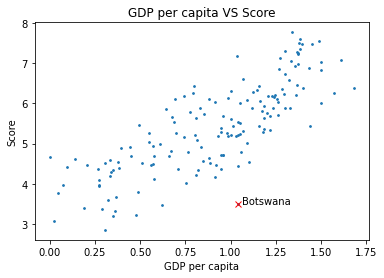

In [12]:
plt.close()
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(x_col + ' VS ' + y_col)
plot_scatter(data, x_col, y_col)
plot_scatter(outliers, x_col, y_col, i_col='Country or region', outlier=True)